In [1]:
import biopandas

In [2]:
from biopandas.pdb import PandasPdb
ppdb = PandasPdb().fetch_pdb('3eiy')
ppdb.df['ATOM'].head()

,record_name,atom_number,blank_1,atom_name,alt_loc,residue_name,blank_2,chain_id,residue_number,insertion,...,x_coord,y_coord,z_coord,occupancy,b_factor,blank_4,segment_id,element_symbol,charge,line_idx
0,ATOM,1,,N,,SER,,A,2,,...,2.527,54.656,-1.667,1.0,52.73,,,N,NaN,609
1,ATOM,2,,CA,,SER,,A,2,,...,3.259,54.783,-0.368,1.0,52.54,,,C,NaN,610
2,ATOM,3,,C,,SER,,A,2,,...,4.127,53.553,-0.105,1.0,52.03,,,C,NaN,611
3,ATOM,4,,O,,SER,,A,2,,...,5.274,53.451,-0.594,1.0,52.45,,,O,NaN,612
4,ATOM,5,,CB,,SER,,A,2,,...,2.273,54.944,0.792,1.0,52.69,,,C,NaN,613


In [3]:
mypdb = PandasPdb().read_pdb('./AF-F4HVG8-F1-model_v4.pdb')

In [4]:
import pandas as pd
mypdb.df['ATOM'].to_xml('./AF-F4HVG8-F1-model_v4.xml')
pd.options.display.max_columns = None
mypdb.df['ATOM']
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


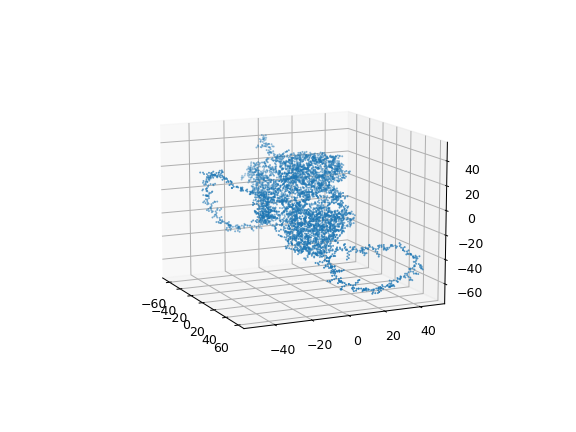

In [65]:
%matplotlib notebook
import pandas as pd
myfile = open('./AF-F4HVG8-F1-model_v4.pdb')
l = myfile.readline()
while l:
    if l.startswith("MODEL"):break
    l = myfile.readline()
file = pd.read_csv(myfile, sep="\s+", names=["group_PDB","id","type_symbol","label_atom_id","chain_id","residue_number","Cartn_x","Cartn_y","Cartn_z","occupancy","B_iso_or_equiv","element_symbol"])
#print(file[:-2].head())
myfile.close()
file = file[:-2]
fig = plt.Figure(figsize = (10, 7))

ax = plt.axes(projection="3d")
ax.scatter3D(xs=file['Cartn_x'],ys=file['Cartn_y'],zs=file['Cartn_z'], s=0.3)

<IPython.core.display.Javascript object>


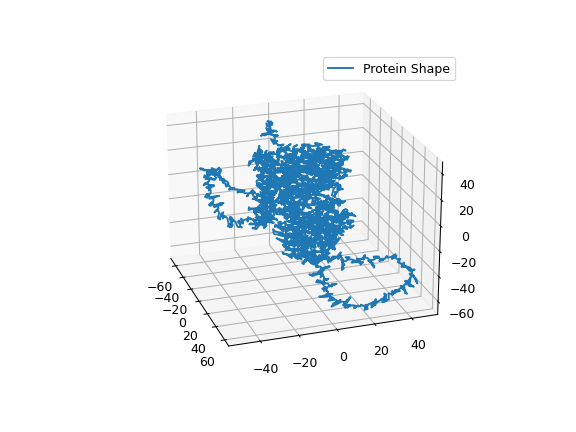

In [66]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
ax = plt.figure().add_subplot(projection='3d')
ax.plot(xs=file['Cartn_x'],ys=file['Cartn_y'],zs=file['Cartn_z'],label='Protein Shape')
ax.legend()
plt.show()

In [18]:
'''myfile = ""
myfile = open("./5x18.xml")
l = myfile.readline()
while l:
    if l.startswith("      <PDBx:atom_site id="):
        for i in range(18):
            my_column = ""
            starting_index = l.find(':')
            ending_index = l.find('>')
            my_column = l[starting_index+1:ending_index]
            if my_column.find('=')!=-1:
                temp = my_column.find('=')
                sep1 = my_column[:temp]
                sep_val = my_column[temp+2:-1]
                print(my_column)
            else:
                end_of_my_value_index = l.find('<', ending_index +1)
                print(my_column + " " + l[ending_index+1:end_of_my_value_index])
            l = myfile.readline()
    l = myfile.readline()'''

'myfile = ""\nmyfile = open("./5x18.xml")\nl = myfile.readline()\nwhile l:\n    if l.startswith("      <PDBx:atom_site id="):\n        for i in range(18):\n            my_column = ""\n            starting_index = l.find(\':\')\n            ending_index = l.find(\'>\')\n            my_column = l[starting_index+1:ending_index]\n            if my_column.find(\'=\')!=-1:\n                temp = my_column.find(\'=\')\n                sep1 = my_column[:temp]\n                sep_val = my_column[temp+2:-1]\n                print(my_column)\n            else:\n                end_of_my_value_index = l.find(\'<\', ending_index +1)\n                print(my_column + " " + l[ending_index+1:end_of_my_value_index])\n            l = myfile.readline()\n    l = myfile.readline()'